In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from math import pi

In [ ]:
df_original = pd.read_csv("Dataset Datathon - Sheet1.csv")
df_original.head()

,Kabupaten/Kota,Tahun,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Harapan Lama Sekolah (Tahun),Rata-rata Lama sekolah (Tahun),Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen),Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),...,STATUS BALITA KURUS BB TB\r\n,STATUS BALITA PENDEK TB U\r\n,PRODUKSI PADI (TON),DESA KURANG BERKEMBANG,KELURAHAN KURANG BERKEMBANG,KODE KABUPATEN KOTA,DESA CEPAT BERKEMBANG,KELURAHAN BERKEMBANG,KELURAHAN CEPAT BERKEMBANG,DESA BERKEMBANG
0,Pacitan,2020,1389.92,69.28,12.64,7.60,99.82,97.25,77.61,14.71,...,827.0,827.0,83940.9,0,0,3501,11,0,1,62
1,Ponorogo,2020,1305.70,71.57,13.73,7.54,99.61,98.93,78.66,24.69,...,2348.0,2348.0,377333.2,13,13,3502,11,11,2,120
2,Trenggalek,2020,1147.22,70.10,12.35,7.55,99.70,94.22,78.70,13.86,...,1144.0,1144.0,108445.6,0,0,3503,0,0,0,73
3,Tulungagung,2020,1055.65,73.15,13.31,8.33,99.58,98.47,79.72,25.06,...,2075.0,2075.0,214398.1,0,0,3504,0,0,0,0
4,Blitar,2020,1336.48,71.02,12.46,7.39,99.39,98.19,70.33,19.61,...,1462.0,1462.0,196847.5,12,12,3505,4,16,0,44


In [ ]:
df = df_original.copy()

In [ ]:
df = df[df['Tahun'] == 2024]
df.drop(columns=['Tahun'], inplace=True)

In [ ]:
df.columns

Index(['Kabupaten/Kota', 'Luas Wilayah', 'Indeks Pembangunan Manusia (IPM)',
       'Harapan Lama Sekolah (Tahun)', 'Rata-rata Lama sekolah (Tahun)',
       'Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen)',
       'Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen)',
       'Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen)',
       'Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen)',
       'Rasio Guru per Siswa', 'Persentase Penduduk (Persen)',
       'Persentase Penduduk Miskin (Persen)',
       'Tingkat Pengangguran Terbuka (TPT) - Agustus',
       'Tingkat Partisipasi Angkatan Kerja - Agustus',
       'Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)',
       'Persentase Rumah Tangga dengan Akses Air Bersih',
       'Laju Pertumbuhan Penduduk per Tahun (persen)',
       'Kepadatan Penduduk per km persegi (km²)', 'Gini Ratio',
       'Jumlah masyarakat miskin \ndan tidak mampu yang dapat\nmengakses pelayanan kesehatan (orang)',
       'Jumlah Penerima Bansos', 'Jumlah

In [ ]:
df.drop(columns=[ 'KODE KABUPATEN KOTA', 'Persentase Penduduk (Persen)', 'DESA KURANG BERKEMBANG', 'KELURAHAN KURANG BERKEMBANG', 'DESA CEPAT BERKEMBANG', '    KELURAHAN BERKEMBANG', 'KELURAHAN CEPAT BERKEMBANG', 'DESA BERKEMBANG'], inplace=True)

In [ ]:
df

,Kabupaten/Kota,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Harapan Lama Sekolah (Tahun),Rata-rata Lama sekolah (Tahun),Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen),Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),Rasio Guru per Siswa,...,Kepadatan Penduduk per km persegi (km²),Gini Ratio,Jumlah masyarakat miskin \ndan tidak mampu yang dapat\nmengakses pelayanan kesehatan (orang),Jumlah Penerima Bansos,Jumlah Penduduk (Ribu) Semester 1,Jumlah Penduduk (Ribu) Semester 2,STATUS BALITA GIZI KURANG BB,STATUS BALITA KURUS BB TB\r\n,STATUS BALITA PENDEK TB U\r\n,PRODUKSI PADI (TON)
152,Pacitan,1389.92,70.94,12.69,7.88,99.55,96.64,84.81,10.75,9.22,...,411.0,327.00,255,2059,217605,216724,16715.0,6509.0,6509.0,69650.98
153,Ponorogo,1305.70,73.18,13.78,7.78,98.47,99.33,83.84,20.80,11.94,...,679.0,326.00,114,1101,364915,367589,25770.0,14969.0,14969.0,379244.90
154,Trenggalek,1147.22,71.96,12.63,7.90,99.38,98.85,81.14,13.52,12.07,...,596.0,0.35,27,3174,282051,283435,17086.0,6993.0,6993.0,104859.40
155,Tulungagung,1055.65,74.65,13.36,8.66,99.60,99.91,82.04,22.07,11.93,...,973.0,321.00,494,691,413773,417225,28626.0,16265.0,16265.0,214820.80
156,Blitar,1336.48,72.84,12.67,7.83,99.53,97.53,73.67,14.92,12.63,...,724.0,353.00,44,821,462841,466687,36040.0,18268.0,18268.0,171154.00
157,Kediri,1386.05,74.68,13.63,8.24,99.99,97.63,81.87,18.16,14.89,...,1109.0,0.30,97,2244,602096,606398,54864.0,29609.0,29609.0,174072.20
158,Malang,3530.65,73.00,13.49,7.75,99.61,96.92,71.45,28.29,15.89,...,788.0,343.00,303,2460,946999,948471,60557.0,37722.0,37722.0,254793.70
159,Lumajang,1790.90,69.37,12.41,7.14,97.87,98.86,64.70,16.35,13.93,...,638.0,363.00,17,1251,382463,387001,29436.0,16539.0,16539.0,257120.70
160,Jember,3092.34,70.42,13.50,6.52,98.83,95.49,74.35,26.11,14.73,...,786.0,321.00,176,963,921339,933862,98309.0,69095.0,69095.0,623264.90
161,Banyuwangi,5782.40,73.79,13.14,7.76,99.61,99.32,79.98,16.52,14.06,...,488.0,312.00,10,752,671006,676749,22347.0,12069.0,12069.0,395631.40


In [ ]:
# 1. Ringkasan statistik
df.describe(include='all').T

# 2. Cek jumlah missing values
df.isna().sum()

# 3. Cek nilai maksimum / minimum tiap kolom persentase
percent_cols = [c for c in df.columns if "Persen" in c or "persen" in c]
df[percent_cols].agg(['min','max'])

,Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen),Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),Persentase Penduduk Miskin (Persen),Persentase Rumah Tangga dengan Akses Air Bersih,Laju Pertumbuhan Penduduk per Tahun (persen)
min,97.86,90.74,53.30,10.75,3.06,79.26,0.11
max,99.99,99.99,94.58,50.33,20.83,100.00,1.43


# **PRE - PROCESSING**

In [ ]:
print("=== Semua kolom di dataset ===")
for i, c in enumerate(df.columns):
    print(f"{i+1}. {c} ({df[c].dtype})")

# Deteksi kolom ID / label
possible_id_cols = []
for c in df.columns:
    if c.lower().strip() in [
        "kabupaten/kota",
        "kode kabupaten kota",
        "kode_kabupaten_kota",
        "kode kabupaten/kota"
    ]:
        possible_id_cols.append(c)

# Tambah nama kolom yang pasti ID jika ada
for c in ["Kabupaten/Kota", "KODE KABUPATEN KOTA"]:
    if c in df.columns and c not in possible_id_cols:
        possible_id_cols.append(c)

print("\nDetected ID / label cols (will keep for reference):", possible_id_cols)

# Fungsi konversi object -> numeric
def to_numeric_smart(series):
    if series.dtype != 'object':
        return series
    s = series.astype(str).copy()
    s = s.str.replace(',', '.', regex=False)  # REVISED
    s = s.str.replace('%', '', regex=False)
    s = s.str.replace(' ', '', regex=False)
    s = s.str.replace('\xa0', '', regex=False)
    s = s.str.replace(r'[^0-9.\-]', '', regex=True)
    s = s.replace('', np.nan)
    return pd.to_numeric(s, errors='coerce')


# Terapkan konversi
for col in df.columns:
    if df[col].dtype == "object" and col not in possible_id_cols:
        df[col] = to_numeric_smart(df[col])

print("\nKonversi object -> numeric selesai untuk semua kolom kecuali ID")

#Tambahan: Capping 0–100 untuk semua kolom berbasis persen / ratio
percent_cols = [
    # "Persentase Penduduk Miskin",
    "Balita Gizi Kurang (%)",
    "Balita Kurus (%)",
    "Balita Pendek (%)",
    "Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen)",
    "Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen)",
    "Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen)",
    "Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen)",
    "Persentase Rumah Tangga dengan Akses Air Bersih",
    "Tingkat Pengangguran Terbuka (TPT)"
]

for col in percent_cols:
    if col in df.columns:
        df[col] = df[col].clip(lower=0, upper=100)

print("\nCapping 0–100 untuk kolom persen/ratio selesai")


=== Semua kolom di dataset ===
1. Kabupaten/Kota (object)
2. Luas Wilayah (float64)
3. Indeks Pembangunan Manusia (IPM) (float64)
4. Harapan Lama Sekolah (Tahun) (float64)
5. Rata-rata Lama sekolah (Tahun) (float64)
6. Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen) (float64)
7. Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen) (float64)
8. Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen) (float64)
9. Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen) (float64)
10. Rasio Guru per Siswa (float64)
11. Persentase Penduduk Miskin (Persen) (float64)
12. Tingkat Pengangguran Terbuka (TPT) - Agustus (float64)
13. Tingkat Partisipasi Angkatan Kerja - Agustus (float64)
14. Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah) (int64)
15. Persentase Rumah Tangga dengan Akses Air Bersih (float64)
16. Laju Pertumbuhan Penduduk per Tahun (persen) (float64)
17. Kepadatan Penduduk per km persegi (km²) (float64)
18. Gini Ratio (float64)
19. Jumlah masyarakat miskin 
dan tidak mampu yang dapat

In [ ]:
df.head(20)

,Kabupaten/Kota,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Harapan Lama Sekolah (Tahun),Rata-rata Lama sekolah (Tahun),Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen),Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),Rasio Guru per Siswa,...,Kepadatan Penduduk per km persegi (km²),Gini Ratio,Jumlah masyarakat miskin \ndan tidak mampu yang dapat\nmengakses pelayanan kesehatan (orang),Jumlah Penerima Bansos,Jumlah Penduduk (Ribu) Semester 1,Jumlah Penduduk (Ribu) Semester 2,STATUS BALITA GIZI KURANG BB,STATUS BALITA KURUS BB TB\r\n,STATUS BALITA PENDEK TB U\r\n,PRODUKSI PADI (TON)
152,Pacitan,1389.92,70.94,12.69,7.88,99.55,96.64,84.81,10.75,9.22,...,411.0,327.00,255,2059,217605,216724,16715.0,6509.0,6509.0,69650.98
153,Ponorogo,1305.70,73.18,13.78,7.78,98.47,99.33,83.84,20.80,11.94,...,679.0,326.00,114,1101,364915,367589,25770.0,14969.0,14969.0,379244.90
154,Trenggalek,1147.22,71.96,12.63,7.90,99.38,98.85,81.14,13.52,12.07,...,596.0,0.35,27,3174,282051,283435,17086.0,6993.0,6993.0,104859.40
155,Tulungagung,1055.65,74.65,13.36,8.66,99.60,99.91,82.04,22.07,11.93,...,973.0,321.00,494,691,413773,417225,28626.0,16265.0,16265.0,214820.80
156,Blitar,1336.48,72.84,12.67,7.83,99.53,97.53,73.67,14.92,12.63,...,724.0,353.00,44,821,462841,466687,36040.0,18268.0,18268.0,171154.00
157,Kediri,1386.05,74.68,13.63,8.24,99.99,97.63,81.87,18.16,14.89,...,1109.0,0.30,97,2244,602096,606398,54864.0,29609.0,29609.0,174072.20
158,Malang,3530.65,73.00,13.49,7.75,99.61,96.92,71.45,28.29,15.89,...,788.0,343.00,303,2460,946999,948471,60557.0,37722.0,37722.0,254793.70
159,Lumajang,1790.90,69.37,12.41,7.14,97.87,98.86,64.70,16.35,13.93,...,638.0,363.00,17,1251,382463,387001,29436.0,16539.0,16539.0,257120.70
160,Jember,3092.34,70.42,13.50,6.52,98.83,95.49,74.35,26.11,14.73,...,786.0,321.00,176,963,921339,933862,98309.0,69095.0,69095.0,623264.90
161,Banyuwangi,5782.40,73.79,13.14,7.76,99.61,99.32,79.98,16.52,14.06,...,488.0,312.00,10,752,671006,676749,22347.0,12069.0,12069.0,395631.40


# **FEATURE ENGGINEERING**

In [ ]:
# Rasio Ketenagakerjaan (TPAK / TPT)
df['Rasio_Ketenagakerjaan'] = df['Tingkat Partisipasi Angkatan Kerja - Agustus'] / df['Tingkat Pengangguran Terbuka (TPT) - Agustus']
df.drop(columns=['Tingkat Partisipasi Angkatan Kerja - Agustus', 'Tingkat Pengangguran Terbuka (TPT) - Agustus'], inplace=True)

# Tampilkan beberapa baris pertama dengan kolom baru
# display(df[['Kabupaten/Kota', 'Tingkat Partisipasi Angkatan Kerja - Agustus (Persen)', 'Tingkat Pengangguran Terbuka (TPT) - Agustus (Persen)', 'Rasio_Ketenagakerjaan']].head())

In [ ]:
df['Jumlah Penduduk (Ribu)'] = (df['Jumlah Penduduk (Ribu) Semester 1'] + df['Jumlah Penduduk (Ribu) Semester 2'])/2
df.drop(columns=['Jumlah Penduduk (Ribu) Semester 1', 'Jumlah Penduduk (Ribu) Semester 2'], inplace=True)


In [ ]:
df.head()

,Kabupaten/Kota,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Harapan Lama Sekolah (Tahun),Rata-rata Lama sekolah (Tahun),Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen),Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),Rasio Guru per Siswa,...,Kepadatan Penduduk per km persegi (km²),Gini Ratio,Jumlah masyarakat miskin \ndan tidak mampu yang dapat\nmengakses pelayanan kesehatan (orang),Jumlah Penerima Bansos,STATUS BALITA GIZI KURANG BB,STATUS BALITA KURUS BB TB\r\n,STATUS BALITA PENDEK TB U\r\n,PRODUKSI PADI (TON),Rasio_Ketenagakerjaan,Jumlah Penduduk (Ribu)
152,Pacitan,1389.92,70.94,12.69,7.88,99.55,96.64,84.81,10.75,9.22,...,411.0,327.00,255,2059,16715.0,6509.0,6509.0,69650.98,44.612022,217164.5
153,Ponorogo,1305.70,73.18,13.78,7.78,98.47,99.33,83.84,20.80,11.94,...,679.0,326.00,114,1101,25770.0,14969.0,14969.0,379244.90,16.283262,366252.0
154,Trenggalek,1147.22,71.96,12.63,7.90,99.38,98.85,81.14,13.52,12.07,...,596.0,0.35,27,3174,17086.0,6993.0,6993.0,104859.40,17.858407,282743.0
155,Tulungagung,1055.65,74.65,13.36,8.66,99.60,99.91,82.04,22.07,11.93,...,973.0,321.00,494,691,28626.0,16265.0,16265.0,214820.80,13.221239,415499.0
156,Blitar,1336.48,72.84,12.67,7.83,99.53,97.53,73.67,14.92,12.63,...,724.0,353.00,44,821,36040.0,18268.0,18268.0,171154.00,14.969450,464764.0


In [ ]:
# df['Total Kurang Berkembang'] = df['DESA KURANG BERKEMBANG'] + df['KELURAHAN KURANG BERKEMBANG']

# df['Total Berkembang'] = df['DESA BERKEMBANG'] + df['    KELURAHAN BERKEMBANG']

# df['Total Cepat Berkembang'] = df['DESA CEPAT BERKEMBANG'] + df['KELURAHAN CEPAT BERKEMBANG']

# df['Total Areas'] = df['Total Kurang Berkembang'] + df['Total Berkembang'] + df['Total Cepat Berkembang']

# df['Persentase Kurang Berkembang'] = (df['Total Kurang Berkembang'] / df['Total Areas']) * 100

# df['Persentase Berkembang'] = (df['Total Berkembang'] / df['Total Areas']) * 100

# df['Persentase Cepat Berkembang'] = (df['Total Cepat Berkembang'] / df['Total Areas']) * 100

# df['Produksi Padi per Luas Wilayah'] = df['PRODUKSI PADI (TON)'] / df['Luas Wilayah']

# df['Kepadatan Penduduk'] = df['Jumlah Penduduk (Ribu)'] / df['Luas Wilayah']

# df['Persentase Penerima Bansos'] = (df['Jumlah Penerima Bansos'] / df['Jumlah Penduduk (Ribu)']) * 100

In [ ]:
# aps_cols = [
#     "Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen)",
#     "Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen)",
#     "Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen)",
#     "Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen)"
# ]

# df['Rata_Rata_APS'] = df[aps_cols].mean(axis=1)
# df.drop(columns=aps_cols, inplace=True)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# bobot_rata_rata_aps = 1/3
# bobot_rata_rata_lama_sekolah = 1/3
# bobot_harapan_lama_sekolah = 1/3

# # Select the component columns for scaling
# education_components = ['Rata_Rata_APS', 'Rata-rata Lama sekolah (Tahun)', 'Harapan Lama Sekolah (Tahun)']

# # Instantiate and fit_transform the scaler on the component columns
# scaler = MinMaxScaler()
# scaled_components = scaler.fit_transform(df[education_components])

# # Create a DataFrame from the scaled components to make calculations easier
# scaled_components_df = pd.DataFrame(scaled_components, columns=education_components, index=df.index)

# # Calculate the composite education index using the scaled components and weights
# df['Indeks_Pendidikan'] = (bobot_rata_rata_aps * scaled_components_df['Rata_Rata_APS']) + \
#                           (bobot_rata_rata_lama_sekolah * scaled_components_df['Rata-rata Lama sekolah (Tahun)']) + \
#                           (bobot_harapan_lama_sekolah * scaled_components_df['Harapan Lama Sekolah (Tahun)'])

# # Drop the original component columns as they are now incorporated into the index
# df.drop(columns=education_components, inplace=True)

# print("Indeks_Pendidikan calculated using scaled components.")
# display(df[['Kabupaten/Kota', 'Indeks_Pendidikan']].head())

In [ ]:
# # Create the compositeye child nutrition risk index
# df['Indeks_Kerawanan_Gizi_Balita'] = (df['STATUS BALITA GIZI KURANG BB'] + df['STATUS BALITA KURUS  BB TB\r\n'] + df['STATUS BALITA PENDEK TB U\r\n']) / 3.0
# df.drop(columns=['STATUS BALITA GIZI KURANG BB', 'STATUS BALITA KURUS  BB TB\r\n', 'STATUS BALITA PENDEK TB U\r\n'], inplace=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler


numerical_cols = df.select_dtypes(include=np.number).columns.tolist()


# Initialize MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

df_scaled

,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Harapan Lama Sekolah (Tahun),Rata-rata Lama sekolah (Tahun),Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen),Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),Rasio Guru per Siswa,Persentase Penduduk Miskin (Persen),...,Kepadatan Penduduk per km persegi (km²),Gini Ratio,Jumlah masyarakat miskin \ndan tidak mampu yang dapat\nmengakses pelayanan kesehatan (orang),Jumlah Penerima Bansos,STATUS BALITA GIZI KURANG BB,STATUS BALITA KURUS BB TB\r\n,STATUS BALITA PENDEK TB U\r\n,PRODUKSI PADI (TON),Rasio_Ketenagakerjaan,Jumlah Penduduk (Ribu)
0,0.237706,0.266704,0.186352,0.416296,0.793427,0.637838,0.763324,0.000000,0.180884,0.563872,...,0.000000,0.751553,0.282392,0.227804,0.151283,0.064989,0.064989,0.085660,0.959835,0.176548
1,0.223091,0.392476,0.472441,0.401481,0.286385,0.928649,0.739826,0.253916,0.460432,0.340461,...,0.032340,0.749252,0.126246,0.121087,0.245470,0.166900,0.166900,0.486252,0.203766,0.332259
2,0.195587,0.323975,0.170604,0.419259,0.713615,0.876757,0.674419,0.069985,0.473792,0.418683,...,0.022324,0.000115,0.029900,0.352011,0.155142,0.070819,0.070819,0.131217,0.245805,0.245040
3,0.179696,0.475014,0.362205,0.531852,0.816901,0.991351,0.696221,0.286003,0.459404,0.181204,...,0.067817,0.737750,0.547065,0.075415,0.275177,0.182511,0.182511,0.273499,0.122044,0.383694
4,0.228432,0.373386,0.181102,0.408889,0.784038,0.734054,0.493459,0.105356,0.531346,0.287001,...,0.037770,0.811364,0.048726,0.089896,0.352296,0.206640,0.206640,0.216997,0.168702,0.435148
5,0.237035,0.476698,0.433071,0.469630,1.000000,0.744865,0.692103,0.187216,0.763618,0.387732,...,0.084228,0.000000,0.107420,0.248413,0.548098,0.343255,0.343255,0.220773,0.086039,0.580828
6,0.609220,0.382369,0.396325,0.397037,0.821596,0.668108,0.439680,0.443153,0.866393,0.333146,...,0.045493,0.788360,0.335548,0.272474,0.607314,0.440986,0.440986,0.325221,0.100032,0.939577
7,0.307295,0.178551,0.112861,0.306667,0.004695,0.877838,0.276163,0.141486,0.664954,0.314575,...,0.027392,0.834369,0.018826,0.137797,0.283603,0.185812,0.185812,0.328232,0.267256,0.351560
8,0.533153,0.237507,0.398950,0.214815,0.455399,0.513514,0.509932,0.388075,0.747174,0.334834,...,0.045252,0.737750,0.194906,0.105715,1.000000,0.818910,0.818910,0.801996,0.250383,0.918548
9,1.000000,0.426727,0.304462,0.398519,0.821596,0.927568,0.646318,0.145781,0.678314,0.195836,...,0.009292,0.717046,0.011074,0.082210,0.209865,0.131966,0.131966,0.507455,0.213287,0.653552


In [ ]:
# Gabungkan Angka Partisipasi Sekolah (APS)
aps_cols = [
    "Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen)",
    "Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen)",
    "Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen)",
    "Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen)"
]

df_scaled['Rata_Rata_APS'] = df_scaled[aps_cols].mean(axis=1)
df_scaled.drop(columns=aps_cols, inplace=True)

# # Tampilkan beberapa baris pertama dengan kolom baru
# # display(df_scaled[['Kabupaten/Kota'] + ['Rata_Rata_APS']].head())

In [ ]:
# Define weights (example: equal weights)
bobot_rata_rata_aps = 1/3
bobot_rata_rata_lama_sekolah = 1/3
bobot_harapan_lama_sekolah = 1/3

# Create the composite education index
df_scaled['Indeks_Pendidikan'] = (bobot_rata_rata_aps * df_scaled['Rata_Rata_APS']) + \
                          (bobot_rata_rata_lama_sekolah * df_scaled['Rata-rata Lama sekolah (Tahun)']) + \
                          (bobot_harapan_lama_sekolah * df_scaled['Harapan Lama Sekolah (Tahun)'])

df_scaled.drop(columns=['Rata-rata Lama sekolah (Tahun)', 'Harapan Lama Sekolah (Tahun)'], inplace=True)

# # Display the first few rows with the new column
# # display(df_scaled[['Kabupaten/Kota', 'Rata_Rata_APS', 'Rata-rata Lama sekolah (Tahun)', 'Harapan Lama Sekolah (Tahun)', 'Indeks_Pendidikan']].head())

In [ ]:
# Create the composite child nutrition risk index
df_scaled['Indeks_Kerawanan_Gizi_Balita'] = (df_scaled['STATUS BALITA GIZI KURANG BB'] + df_scaled['STATUS BALITA KURUS  BB TB\r\n'] + df_scaled['STATUS BALITA PENDEK TB U\r\n']) / 3.0
df_scaled.drop(columns=['STATUS BALITA GIZI KURANG BB', 'STATUS BALITA KURUS  BB TB\r\n', 'STATUS BALITA PENDEK TB U\r\n'], inplace=True)

# # Display the first few rows with the new column
# # display(df_scaled[['Kabupaten/Kota', 'STATUS BALITA GIZI KURANG BB', 'STATUS BALITA KURUS  BB TB\r\n', 'STATUS BALITA PENDEK TB U\r\n', 'Indeks_Kerawanan_Gizi_Balita']].head())

In [ ]:
df_scaled.head(10)

,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Rasio Guru per Siswa,Persentase Penduduk Miskin (Persen),Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah),Persentase Rumah Tangga dengan Akses Air Bersih,Laju Pertumbuhan Penduduk per Tahun (persen),Kepadatan Penduduk per km persegi (km²),Gini Ratio,Jumlah masyarakat miskin \ndan tidak mampu yang dapat\nmengakses pelayanan kesehatan (orang),Jumlah Penerima Bansos,PRODUKSI PADI (TON),Rasio_Ketenagakerjaan,Jumlah Penduduk (Ribu),Rata_Rata_APS,Indeks_Pendidikan,Indeks_Kerawanan_Gizi_Balita
0,0.237706,0.266704,0.180884,0.563872,0.033077,0.044841,0.000000,0.000000,0.751553,0.282392,0.227804,0.085660,0.959835,0.176548,0.548647,0.383765,0.093754
1,0.223091,0.392476,0.460432,0.340461,0.134699,0.730955,0.204545,0.032340,0.749252,0.126246,0.121087,0.486252,0.203766,0.332259,0.552194,0.475372,0.193090
2,0.195587,0.323975,0.473792,0.418683,0.114625,0.270492,0.287879,0.022324,0.000115,0.029900,0.352011,0.131217,0.245805,0.245040,0.583694,0.391186,0.098927
3,0.179696,0.475014,0.459404,0.181204,0.229041,0.898746,0.356061,0.067817,0.737750,0.547065,0.075415,0.273499,0.122044,0.383694,0.697619,0.530559,0.213400
4,0.228432,0.373386,0.531346,0.287001,0.222176,0.826905,0.568182,0.037770,0.811364,0.048726,0.089896,0.216997,0.168702,0.435148,0.529227,0.373073,0.255192
5,0.237035,0.476698,0.763618,0.387732,0.269295,0.614272,0.583333,0.084228,0.000000,0.107420,0.248413,0.220773,0.086039,0.580828,0.656046,0.519582,0.411536
6,0.609220,0.382369,0.866393,0.333146,0.148533,0.912247,0.530303,0.045493,0.788360,0.335548,0.272474,0.325221,0.100032,0.939577,0.593134,0.462166,0.496429
7,0.307295,0.178551,0.664954,0.314575,0.037133,0.782546,0.393939,0.027392,0.834369,0.018826,0.137797,0.328232,0.267256,0.351560,0.325045,0.248191,0.218409
8,0.533153,0.237507,0.747174,0.334834,0.095070,0.879942,0.446970,0.045252,0.737750,0.194906,0.105715,0.801996,0.250383,0.918548,0.466730,0.360165,0.879273
9,1.000000,0.426727,0.678314,0.195836,0.359580,0.876567,0.462121,0.009292,0.717046,0.011074,0.082210,0.507455,0.213287,0.653552,0.635316,0.446099,0.157932


In [ ]:
# corr = df_scaled.corr()['Persentase Penduduk Miskin (Persen)'].abs().sort_values(ascending=False)
# top15 = corr[1:16]
# top15,corr

In [ ]:
df_scaled

,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Rasio Guru per Siswa,Persentase Penduduk Miskin (Persen),Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah),Persentase Rumah Tangga dengan Akses Air Bersih,Laju Pertumbuhan Penduduk per Tahun (persen),Kepadatan Penduduk per km persegi (km²),Gini Ratio,Jumlah masyarakat miskin \ndan tidak mampu yang dapat\nmengakses pelayanan kesehatan (orang),Jumlah Penerima Bansos,PRODUKSI PADI (TON),Rasio_Ketenagakerjaan,Jumlah Penduduk (Ribu),Rata_Rata_APS,Indeks_Pendidikan,Indeks_Kerawanan_Gizi_Balita
0,0.237706,0.266704,0.180884,0.563872,0.033077,0.044841,0.000000,0.000000,0.751553,0.282392,0.227804,0.085660,0.959835,0.176548,0.548647,0.383765,0.093754
1,0.223091,0.392476,0.460432,0.340461,0.134699,0.730955,0.204545,0.032340,0.749252,0.126246,0.121087,0.486252,0.203766,0.332259,0.552194,0.475372,0.193090
2,0.195587,0.323975,0.473792,0.418683,0.114625,0.270492,0.287879,0.022324,0.000115,0.029900,0.352011,0.131217,0.245805,0.245040,0.583694,0.391186,0.098927
3,0.179696,0.475014,0.459404,0.181204,0.229041,0.898746,0.356061,0.067817,0.737750,0.547065,0.075415,0.273499,0.122044,0.383694,0.697619,0.530559,0.213400
4,0.228432,0.373386,0.531346,0.287001,0.222176,0.826905,0.568182,0.037770,0.811364,0.048726,0.089896,0.216997,0.168702,0.435148,0.529227,0.373073,0.255192
5,0.237035,0.476698,0.763618,0.387732,0.269295,0.614272,0.583333,0.084228,0.000000,0.107420,0.248413,0.220773,0.086039,0.580828,0.656046,0.519582,0.411536
6,0.609220,0.382369,0.866393,0.333146,0.148533,0.912247,0.530303,0.045493,0.788360,0.335548,0.272474,0.325221,0.100032,0.939577,0.593134,0.462166,0.496429
7,0.307295,0.178551,0.664954,0.314575,0.037133,0.782546,0.393939,0.027392,0.834369,0.018826,0.137797,0.328232,0.267256,0.351560,0.325045,0.248191,0.218409
8,0.533153,0.237507,0.747174,0.334834,0.095070,0.879942,0.446970,0.045252,0.737750,0.194906,0.105715,0.801996,0.250383,0.918548,0.466730,0.360165,0.879273
9,1.000000,0.426727,0.678314,0.195836,0.359580,0.876567,0.462121,0.009292,0.717046,0.011074,0.082210,0.507455,0.213287,0.653552,0.635316,0.446099,0.157932


In [ ]:
# df_clean = df_scaled[top15.index]

# df_clean.head()

In [ ]:
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_scaled)


Melakukan PCA...
PCA selesai. Data kini memiliki 2 komponen utama.


,PC1,PC2
0,-0.720455,-0.576636
1,-0.261421,0.046405
2,-0.441925,-0.181567
3,0.068118,0.142646
4,-0.089247,-0.010944



Mencari jumlah klaster optimal dengan Elbow Method...


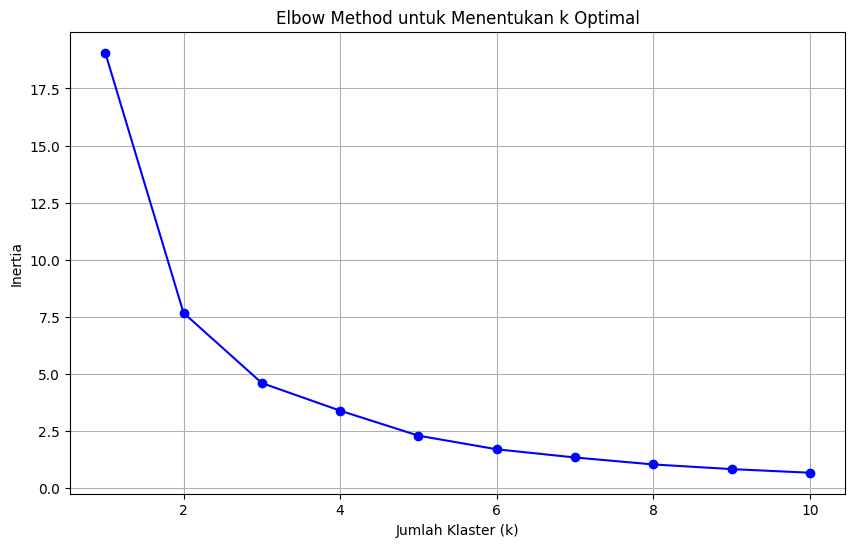

Silakan amati grafik di atas. Titik 'siku' (elbow) adalah nilai k yang disarankan.

Membangun model K-Means final dengan k=3...
Proses clustering selesai. Label klaster telah ditambahkan.

Membuat visualisasi hasil clustering...


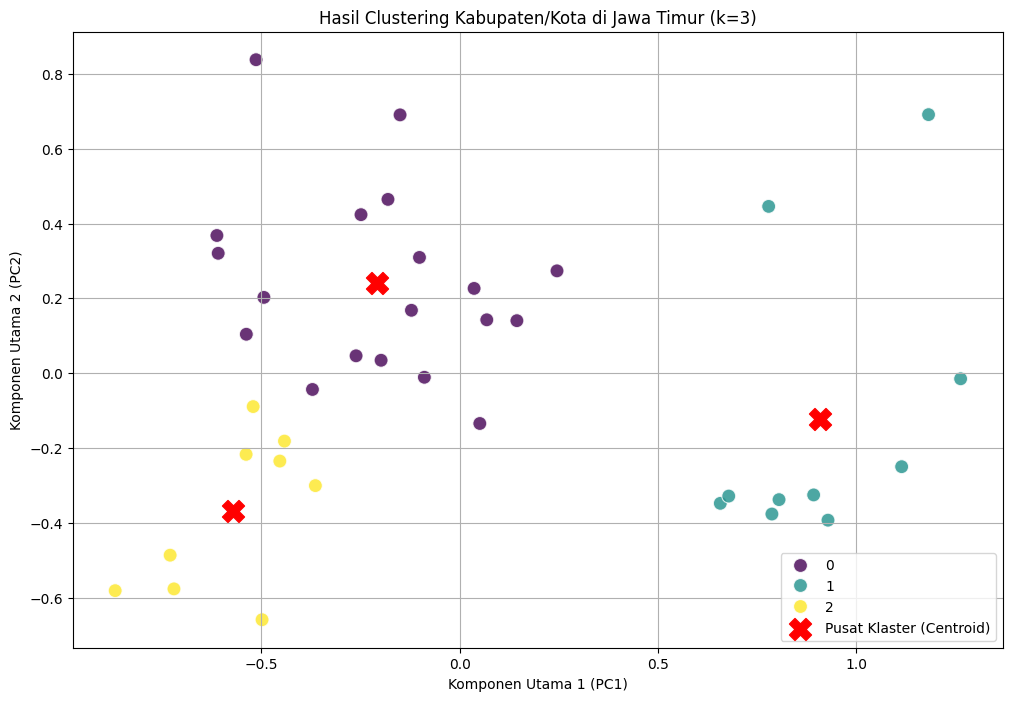

In [ ]:
print("\nMelakukan PCA...")
# Mengambil hanya 2 komponen utama untuk visualisasi
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
print("PCA selesai. Data kini memiliki 2 komponen utama.")
display(df_pca.head())

print("\nMencari jumlah klaster optimal dengan Elbow Method...")
inertia = []
K = range(1, 11)

for k in K:
    kmeans_model = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans_model.fit(df_pca)
    inertia.append(kmeans_model.inertia_)

# Plotting Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.grid(True)
plt.show()
print("Silakan amati grafik di atas. Titik 'siku' (elbow) adalah nilai k yang disarankan.")

optimal_k = 3 # <--- GANTI ANGKA INI SESUAI HASIL ELBOW ANDA
print(f"\nMembangun model K-Means final dengan k={optimal_k}...")

kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
clusters = kmeans_final.fit_predict(df_pca)

# Tambahkan hasil cluster ke DataFrame PCA dan DataFrame original
df_pca['Cluster'] = clusters
df['Cluster'] = clusters
print("Proses clustering selesai. Label klaster telah ditambahkan.")


# === 6. VISUALISASI HASIL CLUSTERING ===
print("\nMembuat visualisasi hasil clustering...")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='viridis', # Anda bisa ganti palet warna lain seperti 'plasma', 'magma', 'cividis'
    s=100, # Ukuran titik
    alpha=0.8
)

# Menambahkan titik pusat (centroid) klaster
centers = kmeans_final.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='red',
    s=250,
    marker='X',
    label='Pusat Klaster (Centroid)'
)

plt.title(f'Hasil Clustering Kabupaten/Kota di Jawa Timur (k={optimal_k})')
plt.xlabel('Komponen Utama 1 (PC1)')
plt.ylabel('Komponen Utama 2 (PC2)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df

,Kabupaten/Kota,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Harapan Lama Sekolah (Tahun),Rata-rata Lama sekolah (Tahun),Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen),Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),Rasio Guru per Siswa,...,Gini Ratio,Jumlah masyarakat miskin \ndan tidak mampu yang dapat\nmengakses pelayanan kesehatan (orang),Jumlah Penerima Bansos,STATUS BALITA GIZI KURANG BB,STATUS BALITA KURUS BB TB\r\n,STATUS BALITA PENDEK TB U\r\n,PRODUKSI PADI (TON),Rasio_Ketenagakerjaan,Jumlah Penduduk (Ribu),Cluster
152,Pacitan,1389.92,70.94,12.69,7.88,99.55,96.64,84.81,10.75,9.22,...,327.00,255,2059,16715.0,6509.0,6509.0,69650.98,44.612022,217164.5,2
153,Ponorogo,1305.70,73.18,13.78,7.78,98.47,99.33,83.84,20.80,11.94,...,326.00,114,1101,25770.0,14969.0,14969.0,379244.90,16.283262,366252.0,0
154,Trenggalek,1147.22,71.96,12.63,7.90,99.38,98.85,81.14,13.52,12.07,...,0.35,27,3174,17086.0,6993.0,6993.0,104859.40,17.858407,282743.0,2
155,Tulungagung,1055.65,74.65,13.36,8.66,99.60,99.91,82.04,22.07,11.93,...,321.00,494,691,28626.0,16265.0,16265.0,214820.80,13.221239,415499.0,0
156,Blitar,1336.48,72.84,12.67,7.83,99.53,97.53,73.67,14.92,12.63,...,353.00,44,821,36040.0,18268.0,18268.0,171154.00,14.969450,464764.0,0
157,Kediri,1386.05,74.68,13.63,8.24,99.99,97.63,81.87,18.16,14.89,...,0.30,97,2244,54864.0,29609.0,29609.0,174072.20,11.872193,604247.0,0
158,Malang,3530.65,73.00,13.49,7.75,99.61,96.92,71.45,28.29,15.89,...,343.00,303,2460,60557.0,37722.0,37722.0,254793.70,12.396491,947735.0,0
159,Lumajang,1790.90,69.37,12.41,7.14,97.87,98.86,64.70,16.35,13.93,...,363.00,17,1251,29436.0,16539.0,16539.0,257120.70,18.662125,384732.0,0
160,Jember,3092.34,70.42,13.50,6.52,98.83,95.49,74.35,26.11,14.73,...,321.00,176,963,98309.0,69095.0,69095.0,623264.90,18.029925,927600.5,0
161,Banyuwangi,5782.40,73.79,13.14,7.76,99.61,99.32,79.98,16.52,14.06,...,312.00,10,752,22347.0,12069.0,12069.0,395631.40,16.640000,673877.5,0


In [ ]:
# === 7. EVALUASI HASIL CLUSTERING (Opsional) ===
print("\nEvaluasi hasil clustering menggunakan Silhouette Score...")
# Hitung Silhouette Score
# Pastikan df_pca dan clusters memiliki jumlah baris yang sama
if len(df_pca) == len(clusters):
    silhouette_avg = silhouette_score(df_pca, clusters)
    print(f"Silhouette Score Rata-rata: {silhouette_avg:.3f}")

    # Jika ingin melihat Silhouette Score per sampel (opsional, bisa memakan waktu)
    # sample_silhouette_values = silhouette_samples(df_pca, clusters)
    # print("\nSilhouette Score per sampel dihitung.")
else:
    print("Jumlah baris df_pca dan clusters tidak cocok. Tidak dapat menghitung Silhouette Score.")


Evaluasi hasil clustering menggunakan Silhouette Score...
Silhouette Score Rata-rata: 0.732


k=2, silhouette=0.580
k=3, silhouette=0.732
k=4, silhouette=0.713
k=5, silhouette=0.669
k=6, silhouette=0.449
k=7, silhouette=0.515
k=8, silhouette=0.483
k=9, silhouette=0.523
k=10, silhouette=0.489


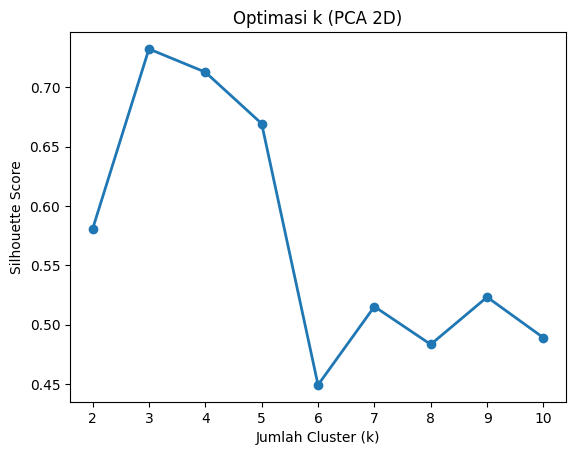

In [ ]:
sil_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_pca)
    sil = silhouette_score(df_pca, labels)
    sil_scores.append(sil)
    print(f"k={k}, silhouette={sil:.3f}")

# --- plot silhouette vs k ---
plt.plot(K, sil_scores, 'o-', linewidth=2)
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Optimasi k (PCA 2D)")
plt.show()

In [ ]:
print(df['Cluster'].value_counts())

Cluster
0    19
1    10
2     9
Name: count, dtype: int64


In [ ]:
cluster_analisis = df.groupby('Cluster').mean(numeric_only=True)
cluster_analisis.to_csv('cluster_analisis.csv', index=True)

In [ ]:
df.to_csv('df_clustered.csv', index=False)

In [ ]:
# Buat DataFrame baru hanya dengan kolom 'Kabupaten/Kota' dan 'Cluster'
df_kabkota_cluster = df[['Kabupaten/Kota', 'Cluster']].copy()

# Ganti nilai klaster dengan nama yang deskriptif
cluster_names = {
    0: "Klaster Bertumbuh dan Stabil",
    1: "Klaster Unggul dan Mandiri",
    2: "Klaster Prioritas Pembangunan"
}

df_kabkota_cluster['Cluster'] = df_kabkota_cluster['Cluster'].replace(cluster_names)

# Tampilkan DataFrame baru
display(df_kabkota_cluster.head())

,Kabupaten/Kota,Cluster
152,Pacitan,Klaster Prioritas Pembangunan
153,Ponorogo,Klaster Bertumbuh dan Stabil
154,Trenggalek,Klaster Prioritas Pembangunan
155,Tulungagung,Klaster Bertumbuh dan Stabil
156,Blitar,Klaster Bertumbuh dan Stabil


In [ ]:
df_kabkota_cluster.to_csv('kabkota_cluster.csv', index=False)
print("DataFrame 'df_kabkota_cluster' berhasil disimpan ke 'kabkota_cluster.csv'")

DataFrame 'df_kabkota_cluster' berhasil disimpan ke 'kabkota_cluster.csv'


# Visualisasi peta

In [ ]:
# pip install earthengine-api --upgrade

In [ ]:
# import ee
# import geemap

In [ ]:
# ee.Authenticate()

In [ ]:
# ee.Initialize(project='euphoric-oath-455703-q3')

##COLLECTING DATA

In [ ]:
# gaul = ee.FeatureCollection('FAO/GAUL_SIMPLIFIED_500m/2015/level2')
# jawatimur = gaul.filter(ee.Filter.eq('ADM0_NAME', 'Indonesia')).filter(ee.Filter.eq('ADM1_NAME', 'Jawa Timur'))
# jawatimur

In [ ]:
# kabkota = jawatimur.aggregate_array('ADM2_NAME').getInfo()
# len(kabkota), kabkota

In [ ]:
# jatim_clean = jawatimur.map(lambda f: f.set('clean_name', ee.String(f.get('ADM2_NAME')).toLowerCase()
                                        # .trim())).filter(ee.Filter.neq('clean_name', 'kota jember'))

In [ ]:
# cleaned_names = jatim_clean.aggregate_array('clean_name').getInfo()
# len(cleaned_names), cleaned_names

In [ ]:
# kabupaten_kota_list = df['Kabupaten/Kota'].tolist()
# len(kabupaten_kota_list),kabupaten_kota_list

In [ ]:
# def clean_kabkota_name(name):
#     """Standardizes Kabupaten/Kota names by converting to lowercase,
#     removing leading/trailing whitespace, and removing 'kabupaten '.
#     Keeps 'kota '.
#     """
#     cleaned_name = str(name).lower().strip()
#     # Keep 'kota ' but remove 'kabupaten '
#     cleaned_name = cleaned_name.replace('kabupaten ', '')
#     return cleaned_name

# # Apply the cleaning function to the DataFrame
# df['clean_name'] = df['Kabupaten/Kota'].apply(clean_kabkota_name)

# # Print unique cleaned names and their count
# print("Unique cleaned Kabupaten/Kota names in DataFrame:")
# print(df['clean_name'].unique())
# print(f"Count of unique cleaned names: {df['clean_name'].nunique()}")

In [ ]:
# print("\nComparing cleaned names:")
# df_names = set(df['clean_name'].unique())
# ee_names = set(cleaned_names)

# print(f"Names in DataFrame but not in Earth Engine: {list(df_names - ee_names)}")
# print(f"Names in Earth Engine but not in DataFrame: {list(ee_names - df_names)}")

In [ ]:
# # Convert the dataframe to a client-side dictionary
# df_dict_client = df.set_index('clean_name')['Persentase Penduduk Miskin (Persen)'].to_dict()

# # Convert the client-side dictionary to an Earth Engine Dictionary
# df_dict_ee = ee.Dictionary(df_dict_client)

# # Function to add poverty percentage to each feature
# def add_poverty_percentage(feature):
#     clean_name = feature.get('clean_name')
#     # Use ee.Dictionary.get() for server-side lookup
#     poverty_percentage = df_dict_ee.get(clean_name, None)
#     return feature.set('Persentase Penduduk Miskin (Persen)', poverty_percentage)

# # Map the function over the Earth Engine FeatureCollection
# joined_features = jatim_clean.map(add_poverty_percentage)

# print("join slesai")
# first_feature_info = joined_features.first().getInfo()
# print(first_feature_info)

**Reasoning**:
The data has been successfully joined with the Earth Engine FeatureCollection. This step visualizes the poverty percentage on a map using `geemap`.

In [ ]:
# Map = geemap.Map(center=[-7.5, 112.5], zoom=8)
# Map.add_basemap('HYBRID')


# vis_params = {
#     'min': 0,
#     'max': 20,
#     'palette': ['green', 'yellow', 'orange', 'red']
# }

# # featurecollection konversi ke image
# poverty_image = ee.Image().paint(
#     featureCollection=joined_features,
#     color='Persentase Penduduk Miskin (Persen)'
# )


# # layer wilayah kemiskinan
# Map.addLayer(
#     poverty_image,
#     vis_params,
#     'Poverty Percentage'
# )

# # legenda
# Map.add_colorbar(vis_params, label="Poverty Percentage (%)")

# # label nama kab/kota
# Map.add_labels(
#     data=joined_features,
#     column='ADM2_NAME',
#     font_size='10pt',
#     text_color='black',
#     font_family='monospace',
# )



# Map

In [ ]:
cluster_analisis = pd.read_csv('cluster_analisis.csv')
display(cluster_analisis)

,Cluster,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Harapan Lama Sekolah (Tahun),Rata-rata Lama sekolah (Tahun),Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen),Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),Rasio Guru per Siswa,...,Kepadatan Penduduk per km persegi (km²),Gini Ratio,Jumlah masyarakat miskin \ndan tidak mampu yang dapat\nmengakses pelayanan kesehatan (orang),Jumlah Penerima Bansos,STATUS BALITA GIZI KURANG BB,STATUS BALITA KURUS BB TB\r\n,STATUS BALITA PENDEK TB U\r\n,PRODUKSI PADI (TON),Rasio_Ketenagakerjaan,Jumlah Penduduk (Ribu)
0,0,1781.052632,73.708421,13.290000,8.044211,99.276842,98.181053,79.627368,19.658947,13.110000,...,838.052632,289.768947,131.157895,2284.684211,38626.894737,26898.157895,26898.157895,399720.563158,15.745240,489136.605263
1,1,150.900000,81.053000,14.730000,10.595000,99.435000,98.965000,85.863000,33.431000,15.443000,...,5237.200000,361.700000,89.000000,1089.700000,10919.700000,7922.400000,7922.400000,27581.774000,13.388416,248987.700000
2,2,1383.832222,69.658889,12.922222,6.608889,99.250000,96.087778,68.095556,14.915556,10.645556,...,663.111111,280.816667,37.555556,2785.333333,19174.111111,14258.888889,14258.888889,155547.453333,28.212956,321197.222222


In [ ]:
cluster_analisis = pd.read_csv('cluster_analisis.csv')
display(cluster_analisis.T)

,0,1,2
Cluster,0.000000,1.000000,2.000000
Luas Wilayah,1781.052632,150.900000,1383.832222
Indeks Pembangunan Manusia (IPM),73.708421,81.053000,69.658889
Harapan Lama Sekolah (Tahun),13.290000,14.730000,12.922222
Rata-rata Lama sekolah (Tahun),8.044211,10.595000,6.608889
Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),99.276842,99.435000,99.250000
Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),98.181053,98.965000,96.087778
Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen),79.627368,85.863000,68.095556
Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),19.658947,33.431000,14.915556
Rasio Guru per Siswa,13.110000,15.443000,10.645556


# **Analisis Hasil Segmentasi Baru**
Berdasarkan analisis data, 38 kabupaten/kota di Jawa Timur telah dikelompokkan ke dalam 3 klaster dengan profil yang sangat berbeda.

## **Klaster 1: Klaster Unggul dan Mandiri**
Klaster ini merepresentasikan puncak pembangunan dan pusat ekonomi di Jawa Timur. Anggotanya didominasi oleh kota-kota besar yang berfungsi sebagai hub atau pusat pertumbuhan.

Karakteristik Utama:

Pembangunan Manusia Tertinggi: Memiliki rata-rata IPM (81.05) dan Rata-rata Lama Sekolah (10.60 tahun) yang paling unggul. Ini menunjukkan kualitas sumber daya manusia yang sangat tinggi.

Kesejahteraan Terbaik: Mencatatkan angka kemiskinan terendah (5.12%) dan pengeluaran per kapita tertinggi (Rp 15,172 ribu). Ini menandakan tingkat ekonomi dan daya beli masyarakat yang kuat.

Karakteristik Urban: Memiliki kepadatan penduduk yang sangat tinggi, menegaskan perannya sebagai pusat urbanisasi, industri, dan jasa.

Anggota Klaster (10 wilayah):
Sidoarjo, Kota Kediri, Kota Blitar, Kota Malang, Kota Probolinggo, Kota Pasuruan, Kota Mojokerto, Kota Madiun, Kota Surabaya, Kota Batu.

## **Klaster 0: Klaster Bertumbuh dan Stabil**
Klaster ini adalah kelompok terbesar yang menjadi "tulang punggung" Jawa Timur. Mereka adalah daerah-daerah dengan kondisi pembangunan yang solid di tingkat menengah dan memiliki potensi besar untuk terus berkembang.

Karakteristik Utama:

Pembangunan Manusia Menengah: Memiliki level IPM (73.71) dan Rata-rata Lama Sekolah (8.04 tahun) yang berada di posisi tengah, menunjukkan fondasi SDM yang baik.

Ekonomi Stabil: Tingkat kemiskinan (9.78%) dan pengeluaran per kapita (Rp 11,753 ribu) berada di level moderat, menggambarkan kondisi ekonomi yang relatif stabil dan terus bertumbuh.

Basis Ekonomi Terdiversifikasi: Anggotanya mencakup kabupaten-kabupaten dengan basis ekonomi yang beragam, mulai dari pertanian, perikanan, hingga industri pengolahan.

Anggota Klaster (19 wilayah):
Ponorogo, Tulungagung, Blitar, Kediri, Malang, Lumajang, Jember, Banyuwangi, Pasuruan, Mojokerto, Jombang, Nganjuk, Madiun, Magetan, Ngawi, Bojonegoro, Tuban, Lamongan, Gresik.

## **Klaster 2: Klaster Prioritas Pembangunan**
Klaster ini merupakan kelompok wilayah yang menghadapi tantangan pembangunan paling signifikan dan memerlukan intervensi kebijakan yang paling intensif dan terfokus.

Karakteristik Utama:

Pembangunan Manusia Terendah: Mencatatkan rata-rata IPM (69.66) dan Rata-rata Lama Sekolah (6.61 tahun) yang paling rendah di antara ketiga klaster.

Tantangan Kemiskinan Struktural: Memiliki tingkat kemiskinan tertinggi (14.98%) dan pengeluaran per kapita terendah (Rp 10,210 ribu).

Tantangan Geografis & Ekonomi: Anggotanya didominasi oleh wilayah di pesisir selatan dan Pulau Madura, yang secara historis memiliki tantangan terkait aksesibilitas dan basis ekonomi yang perlu diperkuat.

Anggota Klaster (9 wilayah):
Pacitan, Trenggalek, Bondowoso, Situbondo, Probolinggo, Bangkalan, Sampang, Pamekasan, Sumenep.

In [ ]:
df_clustered = pd.read_csv("df_clustered.csv")
df_clustered.head()

,Kabupaten/Kota,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Harapan Lama Sekolah (Tahun),Rata-rata Lama sekolah (Tahun),Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen),Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),Rasio Guru per Siswa,...,Gini Ratio,Jumlah masyarakat miskin \ndan tidak mampu yang dapat\nmengakses pelayanan kesehatan (orang),Jumlah Penerima Bansos,STATUS BALITA GIZI KURANG BB,STATUS BALITA KURUS BB TB\r\n,STATUS BALITA PENDEK TB U\r\n,PRODUKSI PADI (TON),Rasio_Ketenagakerjaan,Jumlah Penduduk (Ribu),Cluster
0,Pacitan,1389.92,70.94,12.69,7.88,99.55,96.64,84.81,10.75,9.22,...,327.00,255,2059,16715.0,6509.0,6509.0,69650.98,44.612022,217164.5,2
1,Ponorogo,1305.70,73.18,13.78,7.78,98.47,99.33,83.84,20.80,11.94,...,326.00,114,1101,25770.0,14969.0,14969.0,379244.90,16.283262,366252.0,0
2,Trenggalek,1147.22,71.96,12.63,7.90,99.38,98.85,81.14,13.52,12.07,...,0.35,27,3174,17086.0,6993.0,6993.0,104859.40,17.858407,282743.0,2
3,Tulungagung,1055.65,74.65,13.36,8.66,99.60,99.91,82.04,22.07,11.93,...,321.00,494,691,28626.0,16265.0,16265.0,214820.80,13.221239,415499.0,0
4,Blitar,1336.48,72.84,12.67,7.83,99.53,97.53,73.67,14.92,12.63,...,353.00,44,821,36040.0,18268.0,18268.0,171154.00,14.969450,464764.0,0


In [ ]:
# Create a dictionary to store DataFrames for each cluster
cluster_dfs = {}

# Get unique cluster labels
unique_clusters = df_clustered['Cluster'].unique()

# Iterate through unique clusters and create a DataFrame for each
for cluster_id in unique_clusters:
    cluster_dfs[f'cluster_{cluster_id}'] = df_clustered[df_clustered['Cluster'] == cluster_id].copy()
    print(f"DataFrame for Cluster {cluster_id} created: cluster_{cluster_id}")
    display(cluster_dfs[f'cluster_{cluster_id}'][['Kabupaten/Kota','Persentase Penduduk Miskin (Persen)']])

DataFrame for Cluster 2 created: cluster_2


,Kabupaten/Kota,Persentase Penduduk Miskin (Persen)
0,Pacitan,13.08
2,Trenggalek,10.50
10,Bondowoso,12.60
11,Situbondo,11.51
12,Probolinggo,16.45
25,Bangkalan,18.66
26,Sampang,20.83
27,Pamekasan,13.41
28,Sumenep,17.78


DataFrame for Cluster 0 created: cluster_0


,Kabupaten/Kota,Persentase Penduduk Miskin (Persen)
1,Ponorogo,9.11
3,Tulungagung,6.28
4,Blitar,8.16
5,Kediri,9.95
6,Malang,8.98
7,Lumajang,8.65
8,Jember,9.01
9,Banyuwangi,6.54
13,Pasuruan,8.63
15,Mojokerto,9.37


DataFrame for Cluster 1 created: cluster_1


,Kabupaten/Kota,Persentase Penduduk Miskin (Persen)
14,Sidoarjo,4.53
29,Kota Kediri,6.51
30,Kota Blitar,6.75
31,Kota Malang,3.91
32,Kota Probolinggo,6.18
33,Kota Pasuruan,6.32
34,Kota Mojokerto,5.57
35,Kota Madiun,4.38
36,Kota Surabaya,3.96
37,Kota Batu,3.06


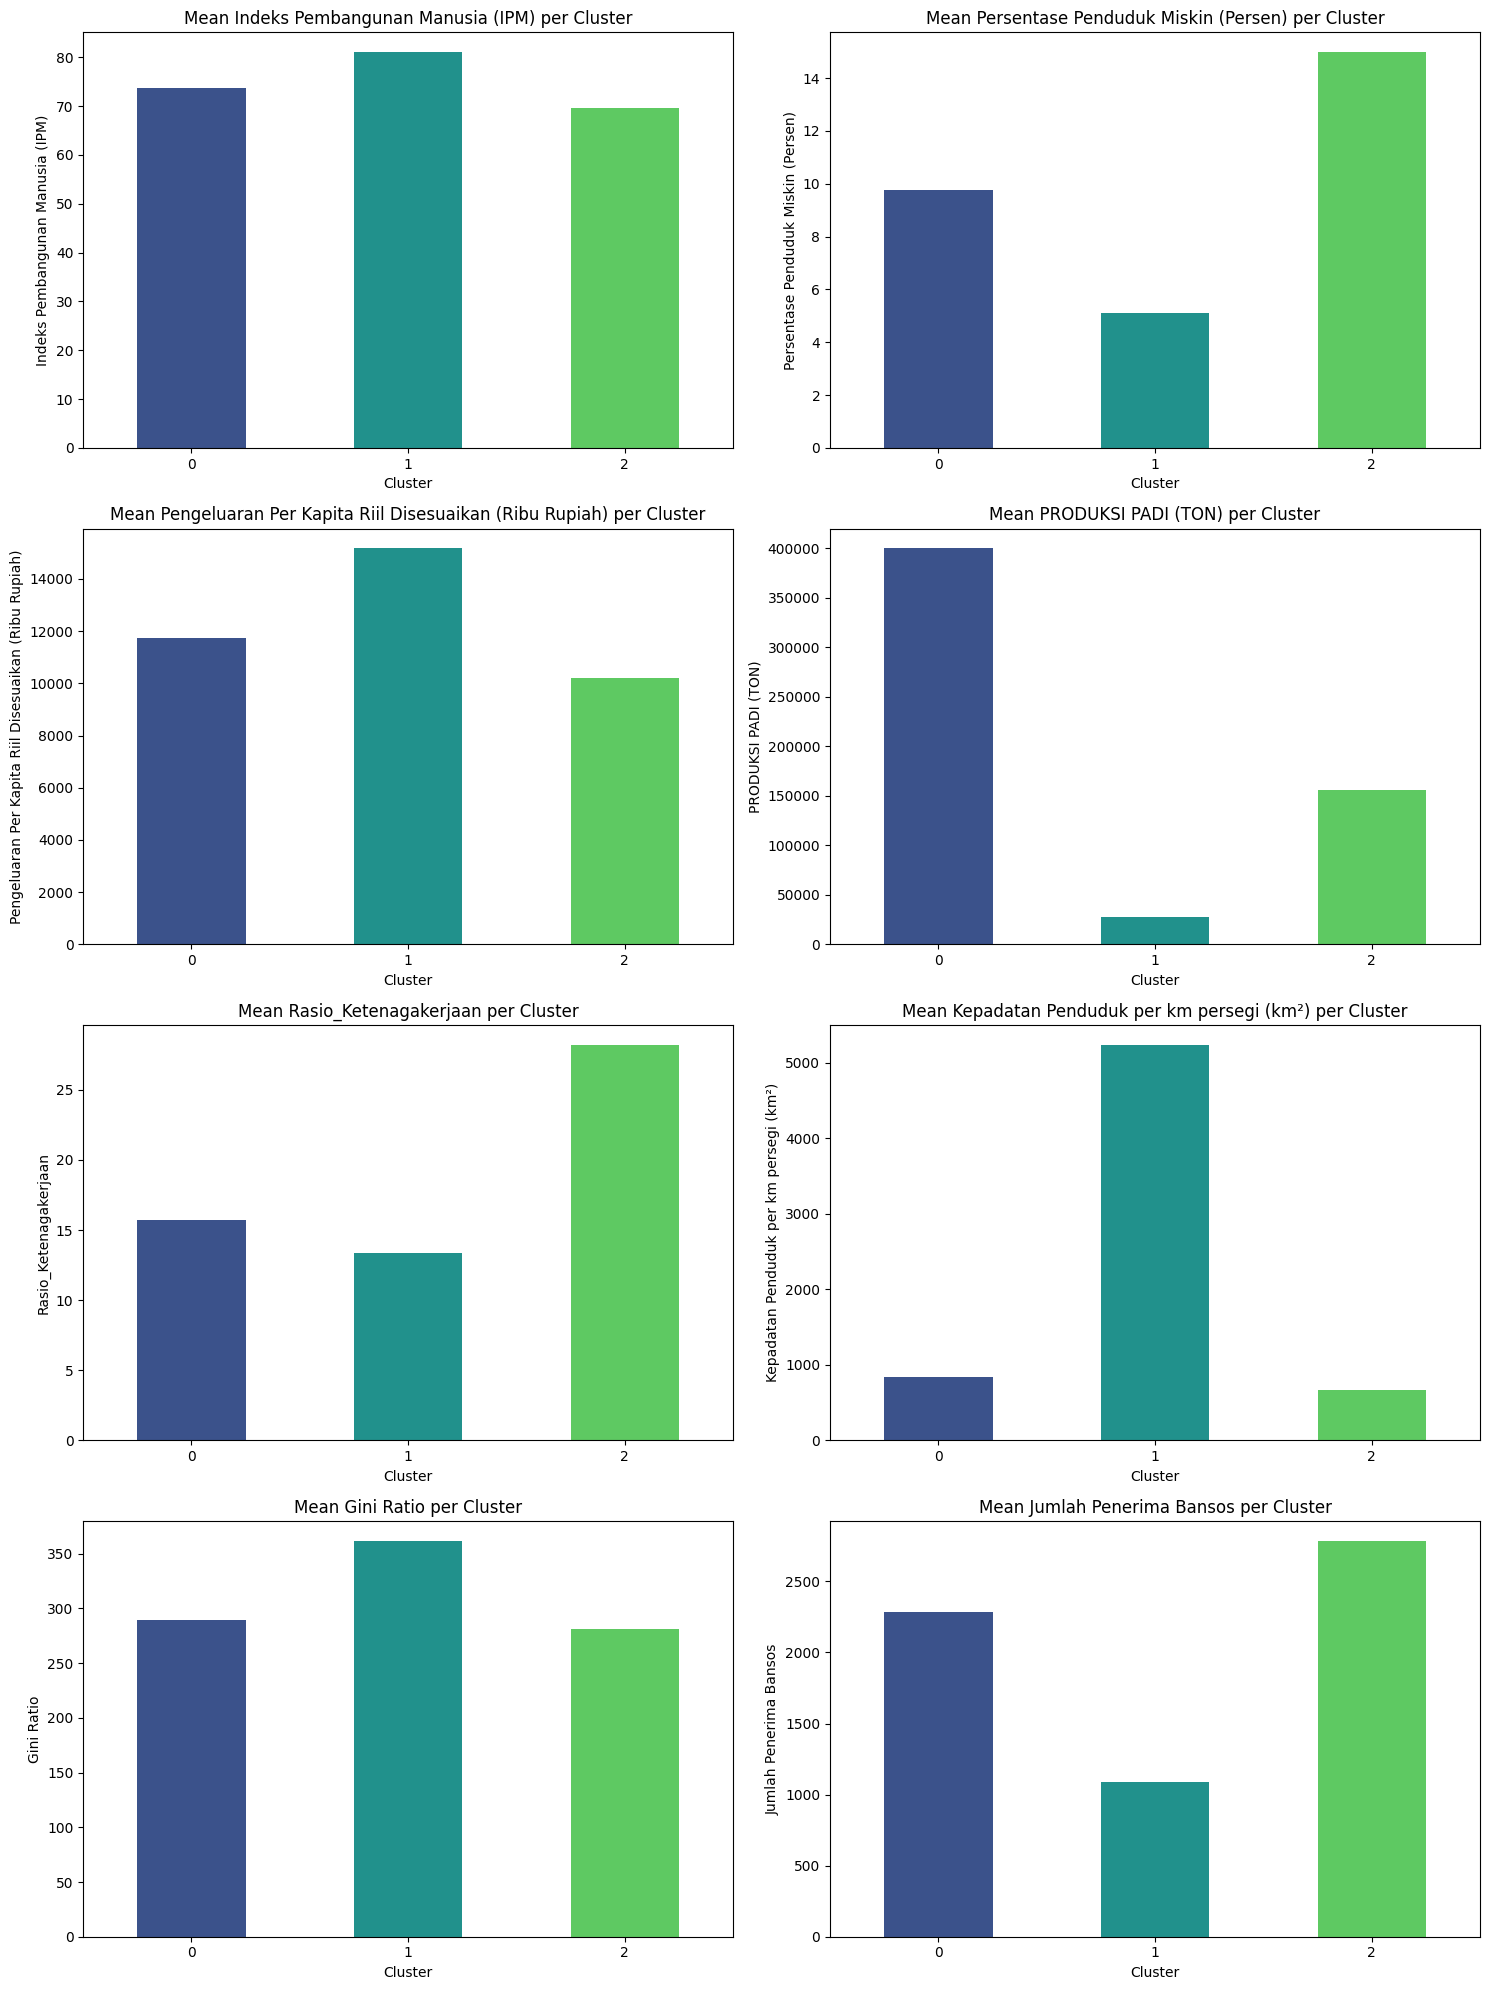

In [ ]:
# Define the key columns for visualization
key_columns = [
    'Indeks Pembangunan Manusia (IPM)',
    'Persentase Penduduk Miskin (Persen)',
    'Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)',
    'PRODUKSI PADI (TON)',
    'Rasio_Ketenagakerjaan',
    'Kepadatan Penduduk per km persegi (km²)',
    'Gini Ratio',
    'Jumlah Penerima Bansos'
]

# Group the data by cluster and calculate the mean for the key columns
cluster_means = df_clustered.groupby('Cluster')[key_columns].mean()

# Plotting bar charts for key columns
num_cols = len(key_columns)
num_rows = (num_cols + 1) // 2  # Arrange plots in two columns

plt.figure(figsize=(15, num_rows * 5))

for i, col in enumerate(key_columns):
    plt.subplot(num_rows, 2, i + 1)
    cluster_means[col].plot(kind='bar', color=sns.color_palette('viridis', len(cluster_means.index)))
    plt.title(f'Mean {col} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
# --- 3. Scatter Plot IPM vs. Poverty ---
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Persentase Penduduk Miskin (Persen)',
    y='Indeks Pembangunan Manusia (IPM)',
    hue='Cluster',
    data=df,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('Hubungan IPM vs. Persentase Kemiskinan', fontsize=16)
plt.xlabel('Persentase Penduduk Miskin (%)')
plt.ylabel('Indeks Pembangunan Manusia (IPM)')
plt.legend(title='Klaster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('scatter_ipm_vs_poverty.png')
plt.close()

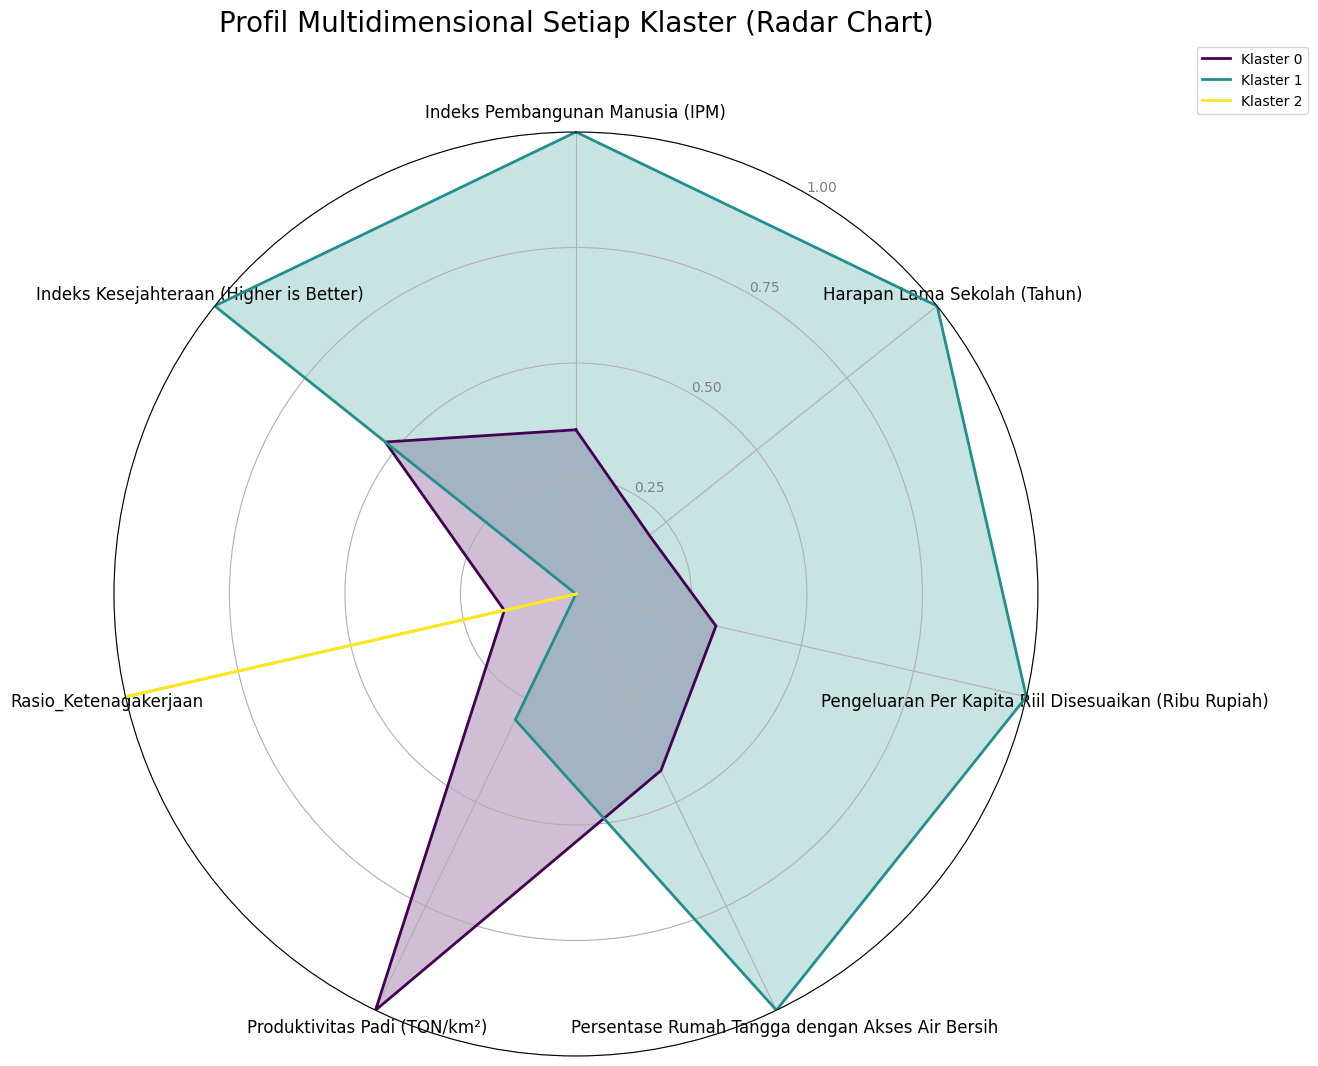

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# --- 1. Memuat dan Mempersiapkan Data ---
# Pastikan file 'df_clustered (2).csv' berada di folder yang sama
try:
    df_clustered = pd.read_csv('df_clustered.csv')
except FileNotFoundError:
    print("Pastikan file 'df_clustered (2).csv' sudah ada di folder yang sama dengan kode Anda.")
    exit()

# --- 2. Memilih Fitur dan Transformasi Data ---

# ===== PERUBAHAN DIMULAI DI SINI =====
# Membuat fitur baru untuk produktivitas (ton per km persegi)
df_clustered['Produktivitas Padi (TON/km²)'] = df_clustered['PRODUKSI PADI (TON)'] / df_clustered['Luas Wilayah']
# Mengatasi jika ada hasil pembagian dengan nol (meskipun kemungkinannya kecil)
df_clustered.replace([np.inf, -np.inf], 0, inplace=True)

# Pilih fitur/kolom yang ingin ditampilkan di radar chart
# 'PRODUKSI PADI (TON)' dihapus dan diganti dengan 'Produktivitas Padi (TON/km²)'
radar_features = [
    'Indeks Pembangunan Manusia (IPM)',
    'Harapan Lama Sekolah (Tahun)',
    'Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)',
    'Persentase Rumah Tangga dengan Akses Air Bersih',
    'Produktivitas Padi (TON/km²)',  # Fitur baru
    'Rasio_Ketenagakerjaan',
]

# Membalik skala 'Persentase Penduduk Miskin'
df_clustered['Indeks Kesejahteraan (Higher is Better)'] = 100 - df_clustered['Persentase Penduduk Miskin (Persen)']
radar_features.append('Indeks Kesejahteraan (Higher is Better)')
# ===== PERUBAHAN SELESAI DI SINI =====


# Hitung nilai rata-rata dari setiap fitur untuk tiap klaster
radar_data = df_clustered.groupby('Cluster')[radar_features].mean()

# --- 3. Normalisasi Data (Langkah Krusial) ---
scaler = MinMaxScaler()
radar_data_scaled = pd.DataFrame(scaler.fit_transform(radar_data), columns=radar_features, index=radar_data.index)

# --- 4. Proses Plotting Radar Chart ---
labels = radar_data_scaled.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
colors = ['#440154', '#21908d', '#fde725']

for i, row in radar_data_scaled.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=colors[i], linewidth=2, linestyle='solid', label=f'Klaster {i}')
    ax.fill(angles, values, color=colors[i], alpha=0.25)

# --- 5. Memberi Label dan Judul (Formatting) ---
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels, size=12)
ax.set_rlabel_position(30)
plt.yticks([0.25, 0.5, 0.75, 1.0], ["0.25", "0.50", "0.75", "1.00"], color="grey", size=10)
plt.ylim(0, 1)
plt.title('Profil Multidimensional Setiap Klaster (Radar Chart)', size=20, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# --- 6. Menampilkan dan Menyimpan Grafik ---
plt.savefig('radar_chart_profiles_balanced.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Persentase Penduduk Miskin (Persen)', data=df_clustered, palette='viridis')
sns.stripplot(x='Cluster', y='Persentase Penduduk Miskin (Persen)', data=df_clustered, color='black', alpha=0.5, jitter=True)
plt.title('Distribusi Persentase Kemiskinan per Klaster', fontsize=16)
plt.xlabel('Klaster')
plt.ylabel('Persentase Penduduk Miskin (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('boxplot_poverty.png')
plt.close()

/tmp/ipython-input-1476948547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Persentase Penduduk Miskin (Persen)', data=df_clustered, palette='viridis')


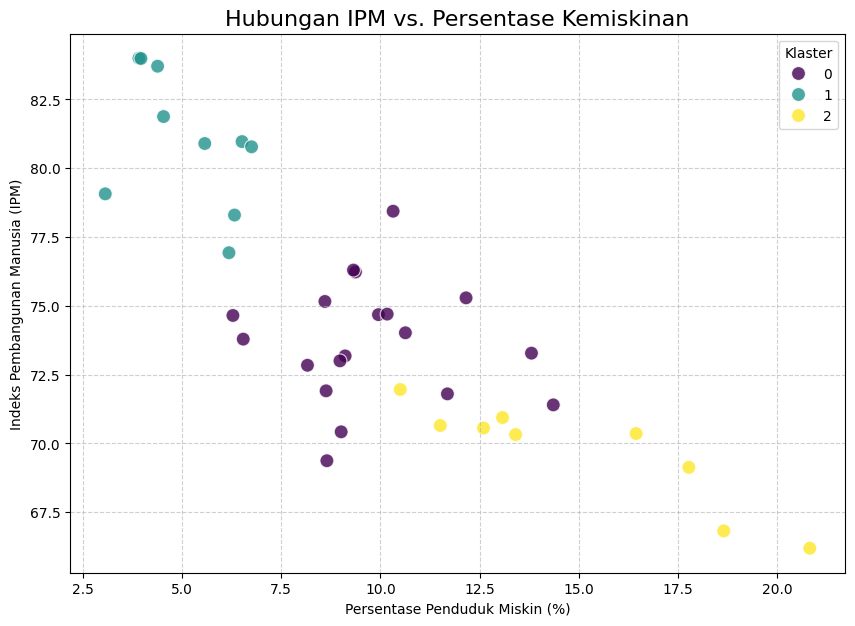

In [ ]:
import matplotlib.pyplot as plt


# --- 3. Scatter Plot IPM vs. Poverty ---
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Persentase Penduduk Miskin (Persen)',
    y='Indeks Pembangunan Manusia (IPM)',
    hue='Cluster',
    data=df,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('Hubungan IPM vs. Persentase Kemiskinan', fontsize=16)
plt.xlabel('Persentase Penduduk Miskin (%)')
plt.ylabel('Indeks Pembangunan Manusia (IPM)')
plt.legend(title='Klaster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('scatter_ipm_vs_poverty.png')
plt.show()

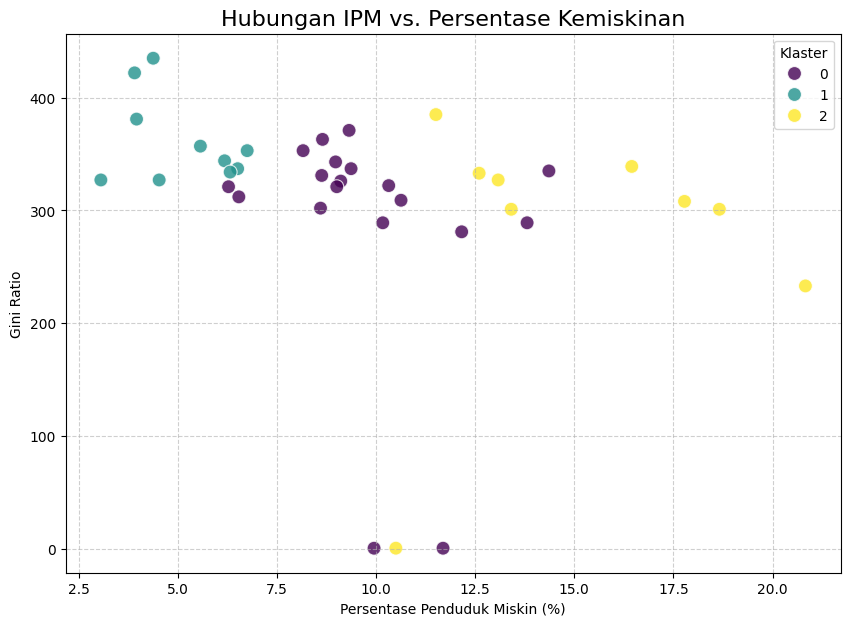

In [ ]:
# --- 3. Scatter Plot IPM vs. Poverty ---
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Persentase Penduduk Miskin (Persen)',
    y='Gini Ratio',
    hue='Cluster',
    data=df,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('Hubungan IPM vs. Persentase Kemiskinan', fontsize=16)
plt.xlabel('Persentase Penduduk Miskin (%)')
plt.ylabel('Gini Ratio')
plt.legend(title='Klaster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('scatter_ipm_vs_poverty.png')
plt.show()